In [1]:
import numpy as np
from scipy import misc

In [26]:

#########
import numpy as np
from scipy import misc
np.random.seed(1)

path = 'unpadded/'
ids = range(1,16)
states = ['centerlight', 'glasses', 'happy', 'leftlight',
          'noglasses', 'normal', 'rightlight','sad',
          'sleepy', 'surprised', 'wink' ]
prefix = 'subject'
surfix = '.pgm'

h = 116
w = 98
D = h * w
N = len(states)*15
K = 100
cnt = 0

X = np.zeros((D, N))
for person_id in range(1,16):
    for state in states:
        fn = path + prefix + str(person_id).zfill(2) + '.' + state + surfix
        X[:, cnt] = misc.imread(fn).reshape(D)
        cnt +=1 
# Doing PCA, note that each row is a datapoint

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100) # k = 100 
pca.fit(X.T)


PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [28]:
U = pca.components_.T
print(np.shape(U.T))

(100, 11368)


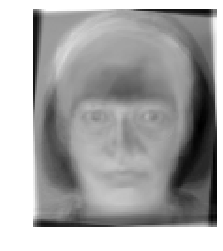

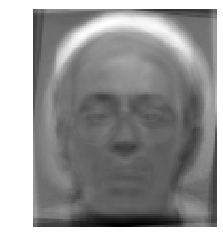

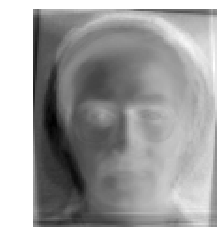

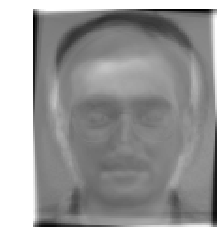

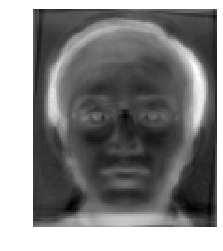

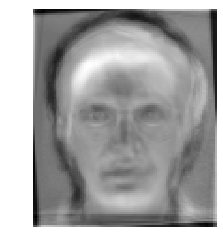

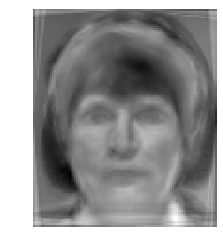

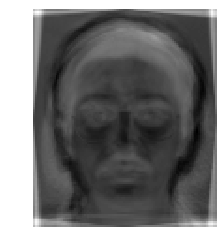

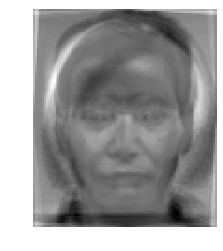

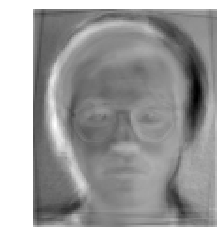

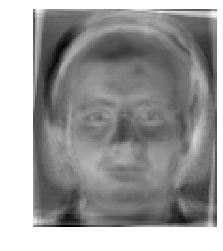

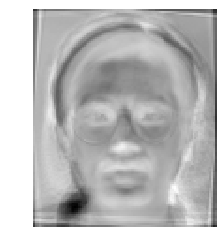

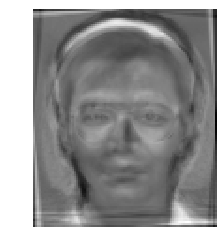

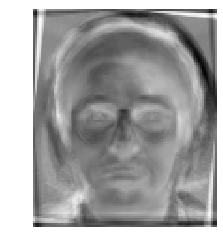

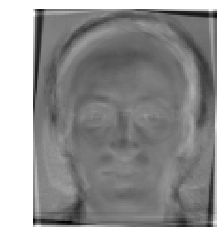

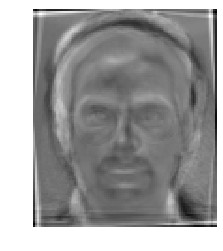

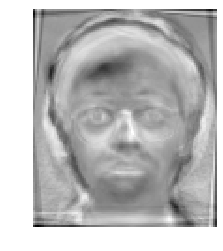

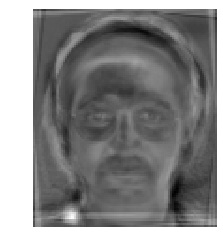

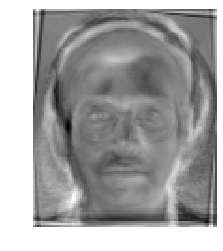

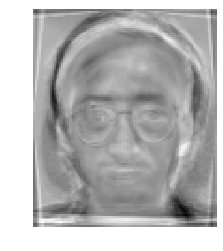

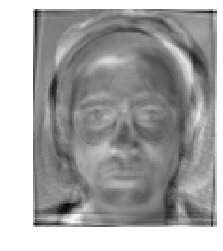

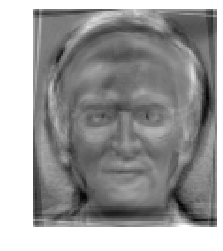

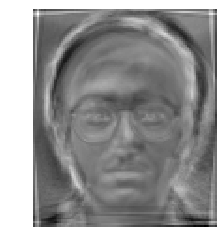

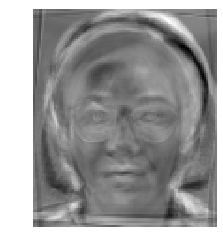

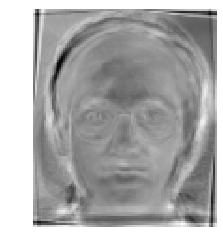

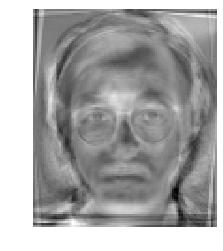

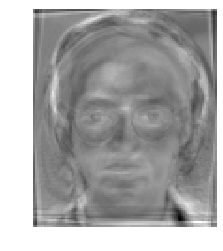

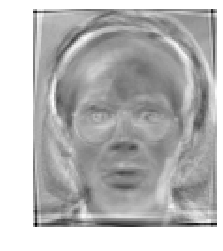

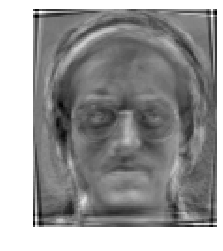

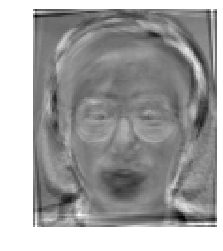

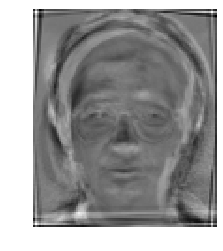

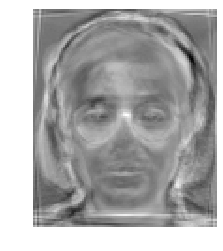

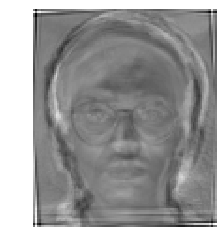

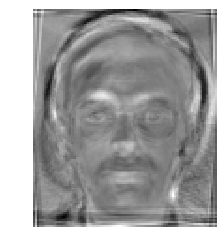

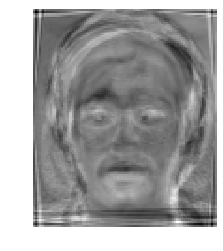

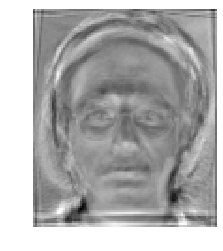

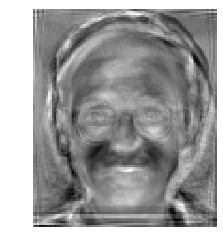

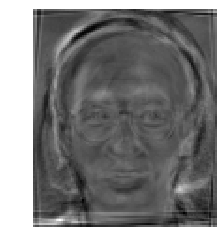

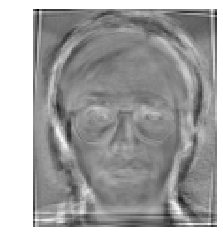

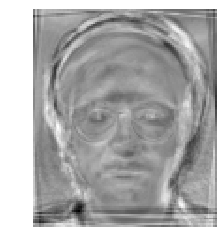

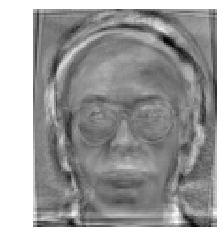

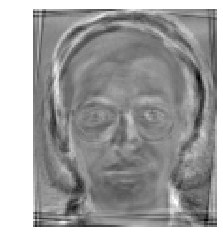

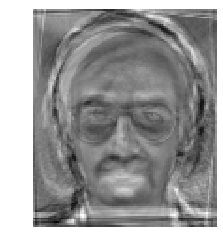

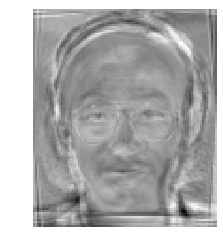

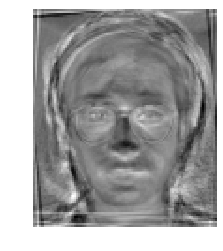

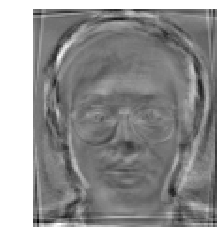

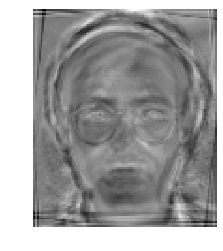

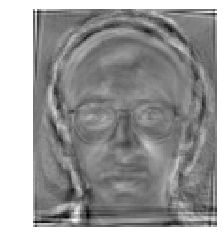

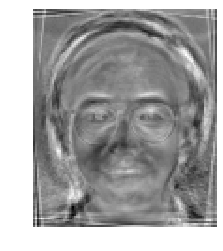

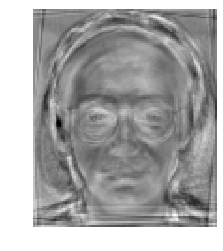

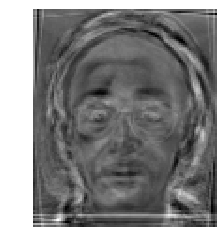

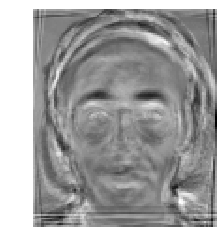

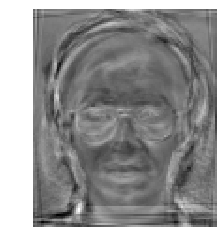

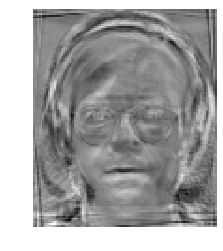

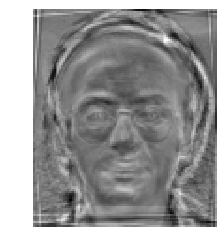

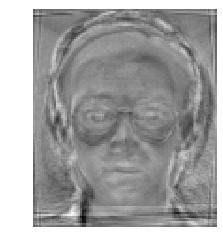

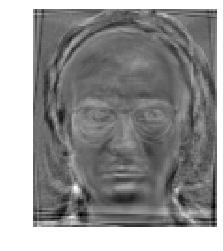

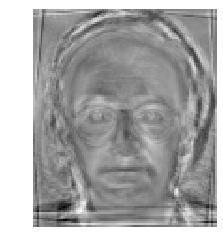

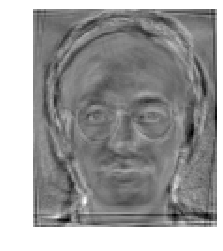

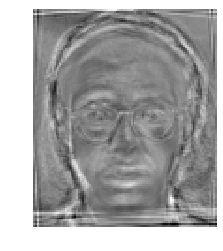

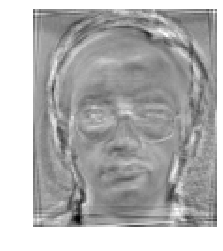

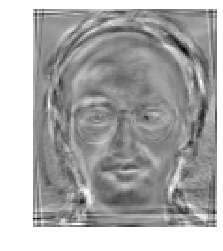

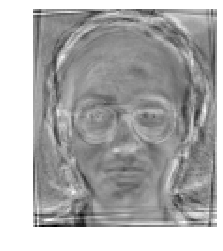

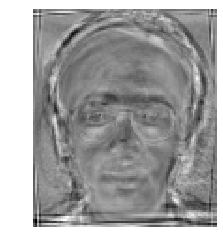

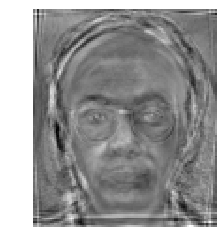

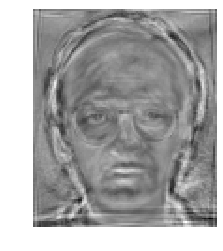

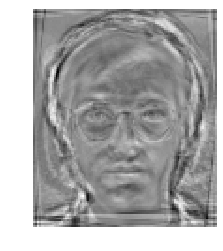

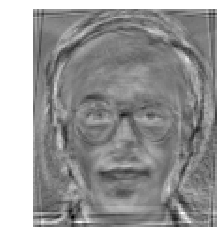

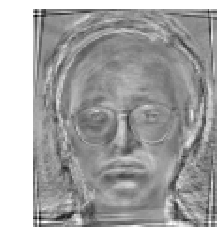

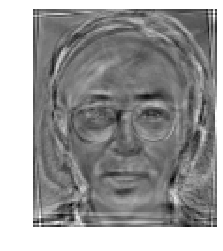

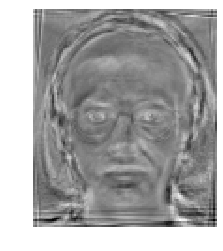

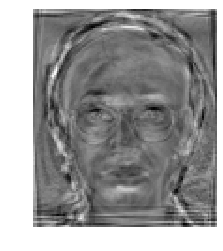

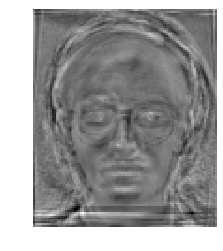

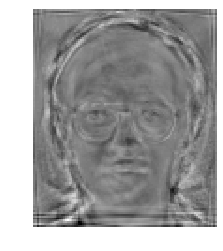

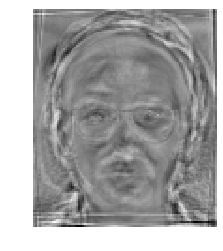

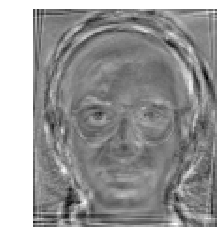

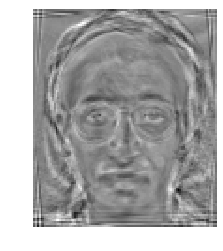

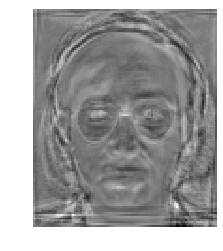

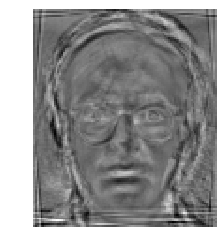

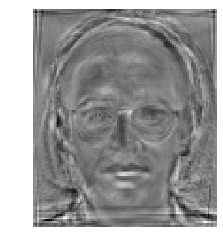

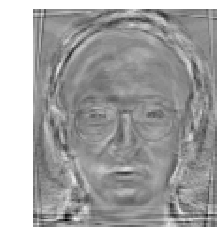

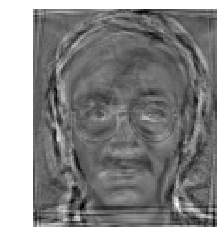

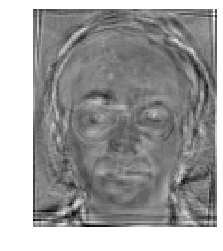

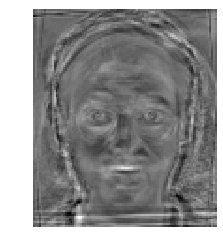

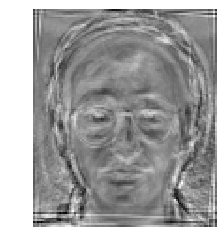

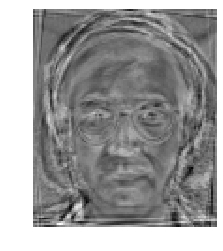

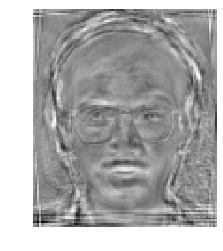

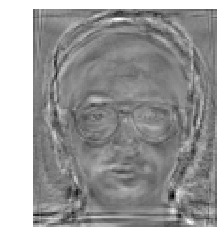

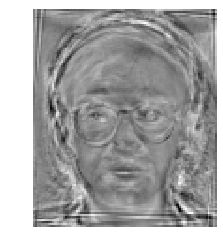

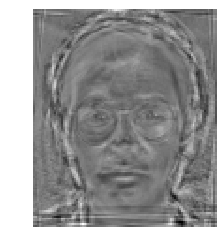

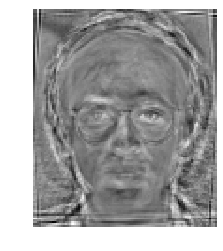

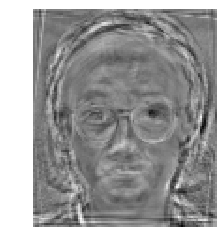

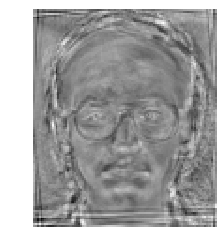

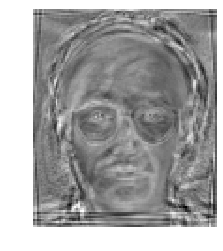

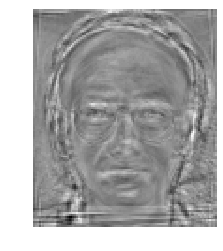

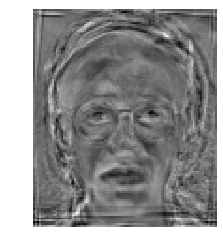

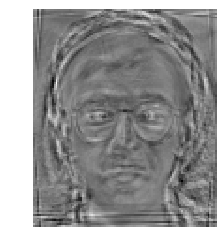

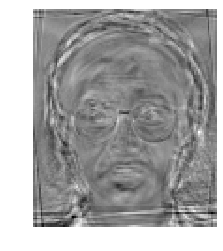

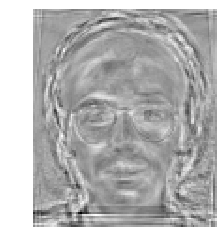

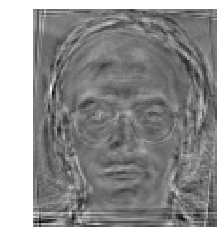

In [29]:
#plot 
import matplotlib.pyplot as plt
for i in range(U.shape[1]):
    plt.axis('off')
    f1 = plt.imshow(U[:, i].reshape(116, 98), interpolation='nearest')
    f1.axes.get_xaxis()
    f1.axes.get_yaxis()
    plt.gray()
    fn = 'eigenface' + str(i).zfill(2) + '.png'
    plt.savefig(fn, bbox_inches='tight', pad_inches=0)
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.


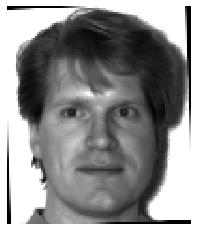

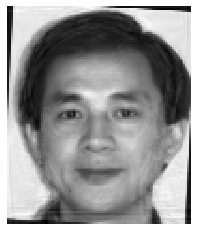

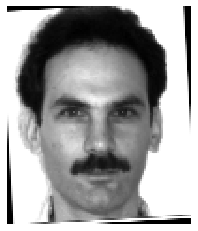

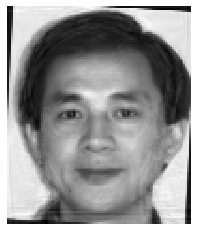

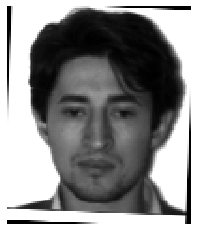

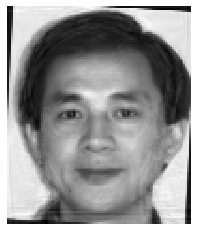

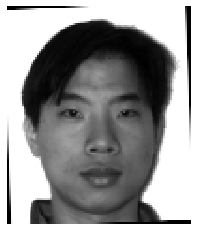

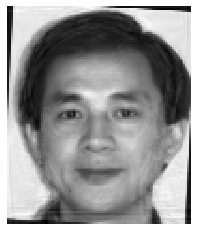

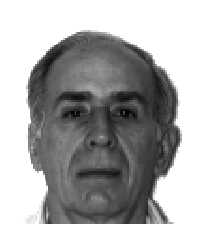

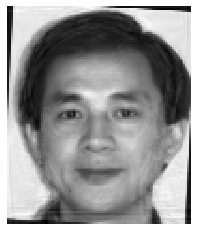

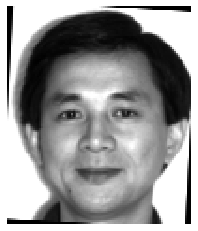

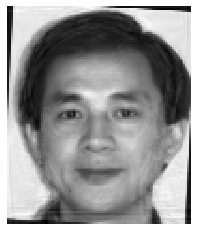

In [43]:

for person_id in range(1, 7):
    for state in ['centerlight']:
        fn = path + prefix + str(person_id).zfill(2) + '.' + state + surfix
        im = misc.imread(fn)
        plt.axis('off')
        
        f1 = plt.imshow(im, interpolation='nearest')
        f1.axes.get_xaxis().set_visible(False)
        f1.axes.get_yaxis().set_visible(False)
        plt.gray()
        fn = 'ori' + str(person_id).zfill(2) + '.png'
        plt.savefig(fn, bbox_inches = 'tight', pad_inches =0 )
        plt.show()
        
        x = im.reshape(D, 1) - pca.mean_.reshape(D ,1)
        # encode
        z = U.T.dot(x)
        # decode
        x_tilde = U.dot(z) + pca.mean_.reshape(D, 1)
        #reshape to original dim
        im_tidle = x_tilde.reshape(116, 98)
        plt.axis('off')
        
        f1 = plt.imshow(im_tilde, interpolation='nearest')
        f1.axes.get_xaxis().set_visible(False)
        f1.axes.get_yaxis().set_visible(False)
        plt.gray()
        fn = 'res' + str(person_id).zfill(2) + '.png'
        plt.savefig(fn, bbox_inches='tight', pad_inches=0)
        plt.show()


In [7]:
print(np.shape(z))
print(z)

(100, 1)
[[ 2.19360474e+03]
 [-1.79110681e+03]
 [ 8.68598160e+02]
 [ 2.51810282e+03]
 [-3.64810726e+03]
 [ 1.81695838e+03]
 [ 1.78318569e+03]
 [-4.07281339e+02]
 [-1.83061704e+03]
 [-6.55018646e+00]
 [ 9.26890630e+02]
 [ 1.07427111e+03]
 [-1.86404529e+02]
 [ 1.68155837e+03]
 [ 1.42946436e+03]
 [ 7.49993859e+01]
 [-6.01001399e+02]
 [ 4.19085903e+02]
 [ 3.60049615e+02]
 [ 1.26300351e+02]
 [-1.03785226e+02]
 [ 9.44278882e+01]
 [-1.25635584e+03]
 [ 4.29520335e+02]
 [-8.63821186e+02]
 [ 1.35439275e+03]
 [ 9.18084731e+02]
 [-8.37565036e+02]
 [-1.18504933e+02]
 [ 5.55721727e+01]
 [-1.63992604e+02]
 [ 4.15972818e+02]
 [ 2.41673922e+01]
 [-2.40927694e+02]
 [-6.19692737e+02]
 [-3.56360615e+02]
 [ 2.10391732e+02]
 [-3.81269560e+02]
 [ 2.39500761e+02]
 [ 1.99861768e+02]
 [ 1.40823704e+02]
 [ 1.26996537e+02]
 [-7.26242592e+01]
 [ 9.92489814e+01]
 [-1.22953418e+02]
 [ 3.11248357e+02]
 [-8.77031346e+01]
 [ 3.10540183e+01]
 [ 3.48779735e+02]
 [ 5.15374138e+02]
 [ 4.45541357e+02]
 [-8.75304675e+01]
 [-

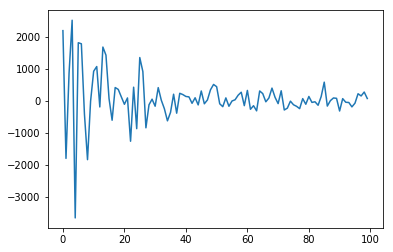

In [8]:
plt.plot(z)